# MIS: Clase Complementaria 13 

In [6]:
# Cargue de paquetes relevantes
import numpy as np
import itertools as it
import networkx as nx

 #### Implementación del  valor de Shapley

In [7]:
# Funciones de valor o de identificación del aporte.

def v(subset,N):
    l = len(subset)
    n = len(N)
    if l>n/2:
        return 1
    else:
        return 0 

def veto(subset,N,j_veto = 0):
    if j_veto in subset:
        l = len(subset)
        n = len(N)
        if l>n/2:
            return 1
        else:
            return 0
    else:
        return 0

In [8]:
# Función que calcula el valor de Shapley

def correciones(tams,tamn):
    Num = (np.math.factorial(tams))*(np.math.factorial(tamn-tams-1))
    Den = np.math.factorial(tamn)
    return Num/Den

def shapley_value(i,N,value_fun):
    M = N.copy()
    M.pop(M.index(i))
    subsets = []
    for k in range(len(M)):
        subsets +=[list(j) for j in it.combinations(M,k)]
    sv = 0
    l0 = len(N)
    for subset in subsets:
        l1 = len(subset)
        sub1 = subset + [i]
        #print(subset,type(subset))
        #print(sub1)
        #print('.'*30)
        correccion = correciones(l1,l0)
        sv += (value_fun(sub1,N)-value_fun(subset,N))*correccion
    return sv

In [9]:
# Valores de Shapley para las funciones de valor propuestas
Jugadores = [u for u in range(10)]
Shapley_Values_Jugadores = {i:shapley_value(i,Jugadores,v) for i in Jugadores}
Shapley_Values_Jugadores_Veto = {i:shapley_value(i,Jugadores,veto) for i in Jugadores}
print(Shapley_Values_Jugadores)
print(Shapley_Values_Jugadores_Veto)

{0: 0.09999999999999978, 1: 0.09999999999999978, 2: 0.09999999999999978, 3: 0.09999999999999978, 4: 0.09999999999999978, 5: 0.09999999999999978, 6: 0.09999999999999978, 7: 0.09999999999999978, 8: 0.09999999999999978, 9: 0.09999999999999978}
{0: 0.39999999999999925, 1: 0.05555555555555549, 2: 0.05555555555555549, 3: 0.05555555555555549, 4: 0.05555555555555549, 5: 0.05555555555555549, 6: 0.05555555555555549, 7: 0.05555555555555549, 8: 0.05555555555555549, 9: 0.05555555555555549}


 #### Implementación del  valor de Myerson

In [10]:
# Función de valor en el juego cooperativo que tiene en cuenta la estructura de red
def v_g(subset,net,value_fun):
    G = nx.subgraph(net,subset)
    Listado = list(nx.weakly_connected_components(G))
    Listado = [list(i) for i in Listado]
    #N = list(G.nodes)
    N = list(net.nodes)
    value = 0
    for subset1 in Listado:
        update = value_fun(subset1,N)
        #print(subset1)
        #print(update)
        value += update    
    return value 

In [11]:
def myerson_value(i,G,value_fun):
    N = list(G.nodes)
    M = N.copy()
    M.pop(M.index(i))
    subsets = []
    for k in range(len(M)):
        subsets +=[list(j) for j in it.combinations(M,k)]
    mv = 0
    l0 = len(N)
    for subset in subsets:
        l1 = len(subset)
        sub1 = subset + [i]
        #print(subset,type(subset))
        #print(sub1)
        #print('.'*30)
        correccion = correciones(l1,l0)
        diferencia = (v_g(sub1,G,value_fun) - v_g(subset,G,value_fun))
        if diferencia<0:
            print(v_g(sub1,G,value_fun))
            print(v_g(subset,G,value_fun))
            print(diferencia,subset,sub1,i)
            raise Exception('Maluco')
        mv += diferencia*correccion
        #mv += (value_fun(sub1,N)-value_fun(subset,N))*correccion
    return mv

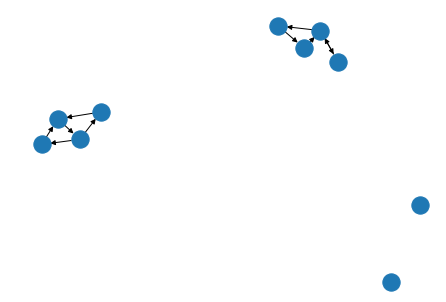

In [12]:
# Propuesta de red
G = nx.DiGraph()
G.add_edges_from([(0,1),(1,0),(1,2),(2,3),(3,1),(5,4),(4,6),(6,7),(7,4),(6,5)])
G.add_nodes_from([8,9])
nx.draw(G)

In [13]:
# Valores de Myerson para las funciones de valor propuestas
Jugadores = list(G.nodes)
Myerson_Values_Jugadores = {i:myerson_value(i,G,v) for i in Jugadores}
Myerson_Values_Jugadores_Veto = {i:myerson_value(i,G,veto) for i in Jugadores}
print(Myerson_Values_Jugadores)
print(Myerson_Values_Jugadores_Veto)
# ¿Por qué da esto?

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 5: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 5: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


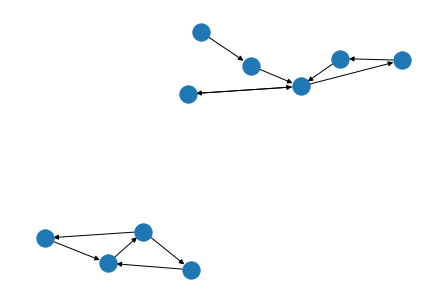

In [14]:
# Unamos a 8 con 9 y a 9 con la coalición del jugador 1
G.add_edges_from([(8,9),(9,1)])
nx.draw(G)

In [15]:
# Valores de Myerson para las funciones de valor propuestas
Jugadores = list(G.nodes)
Myerson_Values_Jugadores = {i:myerson_value(i,G,v) for i in Jugadores}
Myerson_Values_Jugadores_Veto = {i:myerson_value(i,G,veto) for i in Jugadores}
print(Myerson_Values_Jugadores)
print(Myerson_Values_Jugadores_Veto)
# ¿Por qué da esto?

{0: 0.06666666666666667, 1: 0.06666666666666667, 2: 0.06666666666666667, 3: 0.06666666666666667, 5: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.06666666666666667, 9: 0.06666666666666667}
{0: 0.06666666666666667, 1: 0.06666666666666667, 2: 0.06666666666666667, 3: 0.06666666666666667, 5: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.06666666666666667, 9: 0.06666666666666667}
